# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [40]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [41]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [42]:
#  1. Get the total rides for each city type
total_rides_percitytype = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_percitytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [43]:
# 2. Get the total drivers for each city type
total_drivers_percitytype = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_percitytype

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [44]:
#  3. Get the total amount of fares for each city type
total_fares_percitytype = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_percitytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [45]:
#  4. Get the average fare per ride for each city type. 
avrg_fare_percitytype = pyber_data_df.groupby(["type"]).mean()["fare"]
avrg_fare_percitytype2 = total_fares_percitytype / total_rides_percitytype

avrg_fare_percitytype, avrg_fare_percitytype2

(type
 Rural       34.623440
 Suburban    30.970128
 Urban       24.525772
 Name: fare, dtype: float64,
 type
 Rural       34.623440
 Suburban    30.970128
 Urban       24.525772
 dtype: float64)

In [46]:
# 5. Get the average fare per driver for each city type. 
avgr_fare_perdriver_bycitytype = total_fares_percitytype / total_drivers_percitytype
avgr_fare_perdriver_bycitytype

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [47]:
#  6. Create a PyBer summary DataFrame. 
summary_df1 = pd.merge(total_rides_percitytype, total_drivers_percitytype, how="left", on="type")
summary_df2 = pd.merge(summary_df1, total_fares_percitytype, how="left", on="type")
summary_df3 = pd.merge(summary_df2, avrg_fare_percitytype, how="left", on="type")
summary_final = pd.concat([summary_df3, avgr_fare_perdriver_bycitytype], axis=1)
summary_normalized = summary_final.rename(columns={"ride_id": "Total Rides", "driver_count": "Total Drivers", "fare_x": "Total Fares", "fare_y": "Average Fare per Ride", 0: "Average Fare per Driver"})
summary_normalized

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [48]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_normalized.index.name = None

In [49]:
#  8. Format the columns.
summary_normalized["Total Fares"]=summary_normalized["Total Fares"].map('${:,.2f}'.format)
summary_normalized["Average Fare per Ride"]=summary_normalized["Average Fare per Ride"].map('${:,.2f}'.format)
summary_normalized["Average Fare per Driver"]=summary_normalized["Average Fare per Driver"].map('${:,.2f}'.format)
summary_normalized["Total Rides"]=summary_normalized["Total Rides"].map('{:,}'.format)
summary_normalized["Total Drivers"]=summary_normalized["Total Drivers"].map('{:,}'.format)
summary_normalized

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [50]:
# 1. Read the merged DataFrame
pyber_df_grouped = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
pyber_df_grouped

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [51]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_df_grouped

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [52]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_df_grouped = pyber_df_grouped.reset_index()
pyber_df_grouped

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [53]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

#use the pivot() function to convert the DataFrame from the previous step so that the index is the "date," each column is a city "type," and the values are the "fare."
pyber_df_pivot = pyber_df_grouped.pivot(index="date", columns="type", values="fare")
#pyber_df_pivot.info()



In [54]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#df.loc[df['shield'] > 6]
#pyber_df_loc = pyber_df_pivot.loc[pyber_df_pivot["date"]>="2019-01-01" & pyber_df_pivot["date"]<="2019-04-29"]
pyber_df_loc = pyber_df_pivot.loc['2019-01-01':'2019-04-29']
pyber_df_loc.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [55]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_df_loc.index = pd.to_datetime(pyber_df_loc.index)
pyber_df_loc

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [61]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_df_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [75]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_df_resampled = pyber_df_loc.resample('1W').sum()
pyber_df_resampled
pyber_df_resampled.to_csv(r'C:\Users\petur\Desktop\Personal Files\Driving ICBC\test.csv')

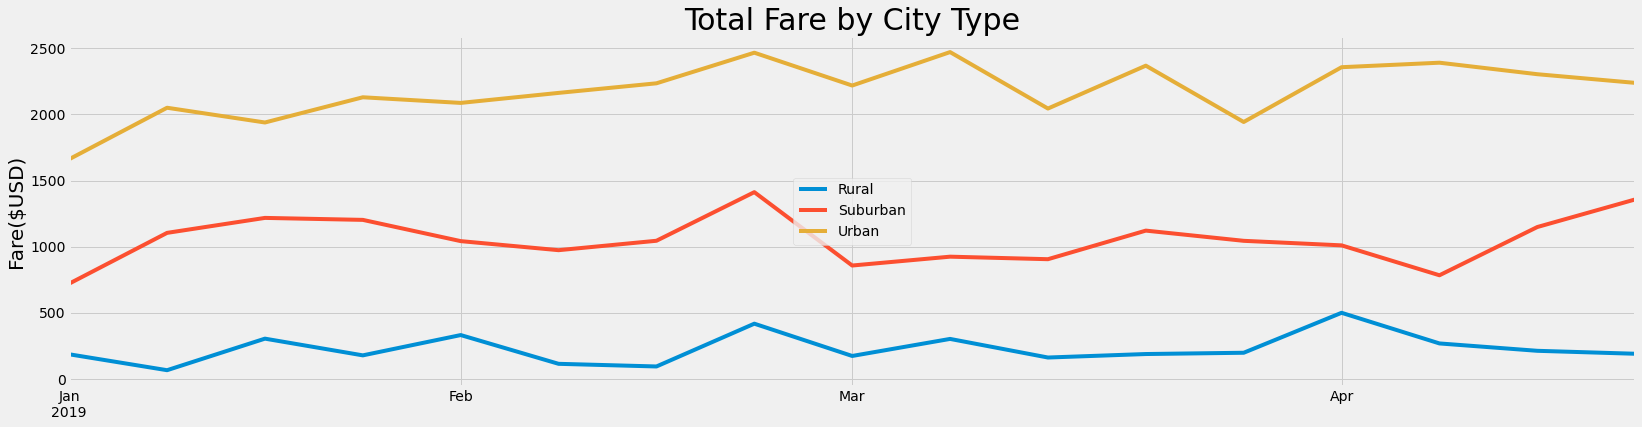

In [71]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
#This is not onject oriented!

pyber_df_resampled.plot(figsize=(25, 6))
plt.ylabel('Fare($USD)', fontsize='20')
plt.xlabel('')
#plt.ylim(0, 2550)
plt.title('Total Fare by City Type', fontsize='30')
plt.legend()

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


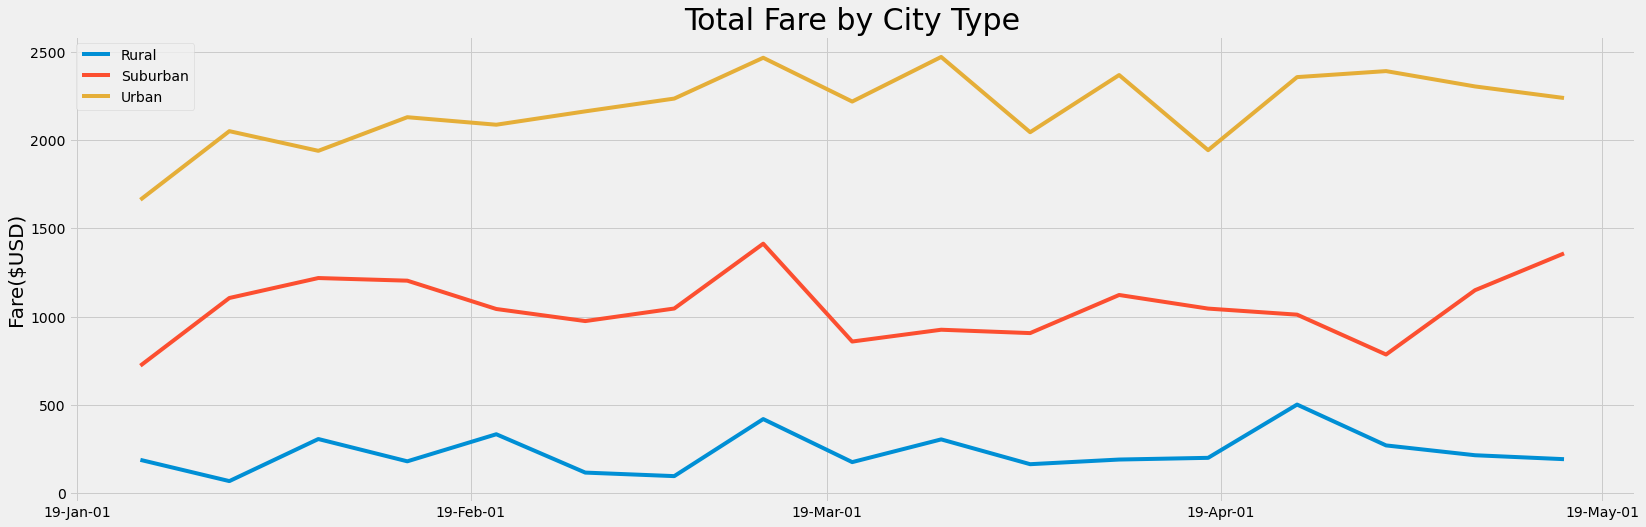

In [97]:
#This is the code version using the onject-oriented interface method;

fig, ax = plt.subplots(figsize=(25,8))
ax.plot(pyber_df_resampled.index, pyber_df_resampled["Rural"], label = 'Rural')
ax.plot(pyber_df_resampled.index, pyber_df_resampled["Suburban"], label = 'Suburban')
ax.plot(pyber_df_resampled.index, pyber_df_resampled["Urban"], label = 'Urban')

ax.set_title('Total Fare by City Type', fontsize='30')
ax.set_ylabel('Fare($USD)', fontsize='20')

#If required to be in the middle, the legend could be relocated by the command loc='center'
ax.legend(loc='best')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%y-%b-%d")

ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=None, bymonthday=1, interval=1, tz=None))
import matplotlib.ticker as ticker


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
